<a href="https://colab.research.google.com/github/Poorni09/Maternal-health-risk-prediction/blob/main/Poornashri_final_project_Maternal_health_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Columns in the dataset:

- `Age`: Age in years when a woman is pregnant.
- `SystolicBP`: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `DiastolicBP`: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `BS`: Blood glucose levels is in terms of a molar concentration, mmol/L.
- `HeartRate`: A normal resting heart rate in beats per minute.
- `Risk Level`: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

#IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")

#Print the first five rows from this dataset

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


# To show any null or nan values in this data frame

In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#To show any duplicate value in this data Fram

In [ ]:
data.duplicated().sum()

562

#Duplicated value

In [ ]:
data.duplicated().any()

True

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().any()

False

In [ ]:
data.shape

(452, 7)

In [ ]:
data["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [ ]:
data["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [ ]:
data["DiastolicBP"].unique()
data["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [ ]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [ ]:
data["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [ ]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
ca_val = [column for column in data.columns if data[column].nunique() <= 10]

In [ ]:
ca_val

['BodyTemp', 'RiskLevel']

In [ ]:
co_val = [column for column in data.columns if data[column].nunique() > 10]

In [ ]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [ ]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [ ]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [ ]:
data["Age"].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [ ]:
risklevel = {"low risk" : 1,
            "mid risk" : 2,
            "high risk" : 3}

data["RiskLevel"] = data["RiskLevel"].map(risklevel).astype(float)
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [ ]:
data["RiskLevel"].value_counts()

RiskLevel
1.0    234
3.0    112
2.0    106
Name: count, dtype: int64

In [ ]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


In [ ]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
data[["RiskLevel", "Age"]].corr()

,RiskLevel,Age
RiskLevel,1.00000,0.18301
Age,0.18301,1.00000


In [ ]:
data[["RiskLevel","SystolicBP"]].corr()

,RiskLevel,SystolicBP
RiskLevel,1.000000,0.327365
SystolicBP,0.327365,1.000000


In [ ]:
data[["RiskLevel","DiastolicBP"]].corr()

,RiskLevel,DiastolicBP
RiskLevel,1.000000,0.254239
DiastolicBP,0.254239,1.000000


In [ ]:
data[["RiskLevel","BodyTemp"]].corr()

,RiskLevel,BodyTemp
RiskLevel,1.000000,0.259701
BodyTemp,0.259701,1.000000


In [ ]:
data[["RiskLevel","BS"]].corr()

,RiskLevel,BS
RiskLevel,1.000000,0.548888
BS,0.548888,1.000000


In [ ]:
data[["RiskLevel","BodyTemp"]].corr()

,RiskLevel,BodyTemp
RiskLevel,1.000000,0.259701
BodyTemp,0.259701,1.000000


In [ ]:
data[["RiskLevel","HeartRate"]].corr()

,RiskLevel,HeartRate
RiskLevel,1.000000,0.183289
HeartRate,0.183289,1.000000


In [ ]:
data[["RiskLevel","RiskLevel"]].corr()

,RiskLevel,RiskLevel
RiskLevel,1.0,1.0
RiskLevel,1.0,1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

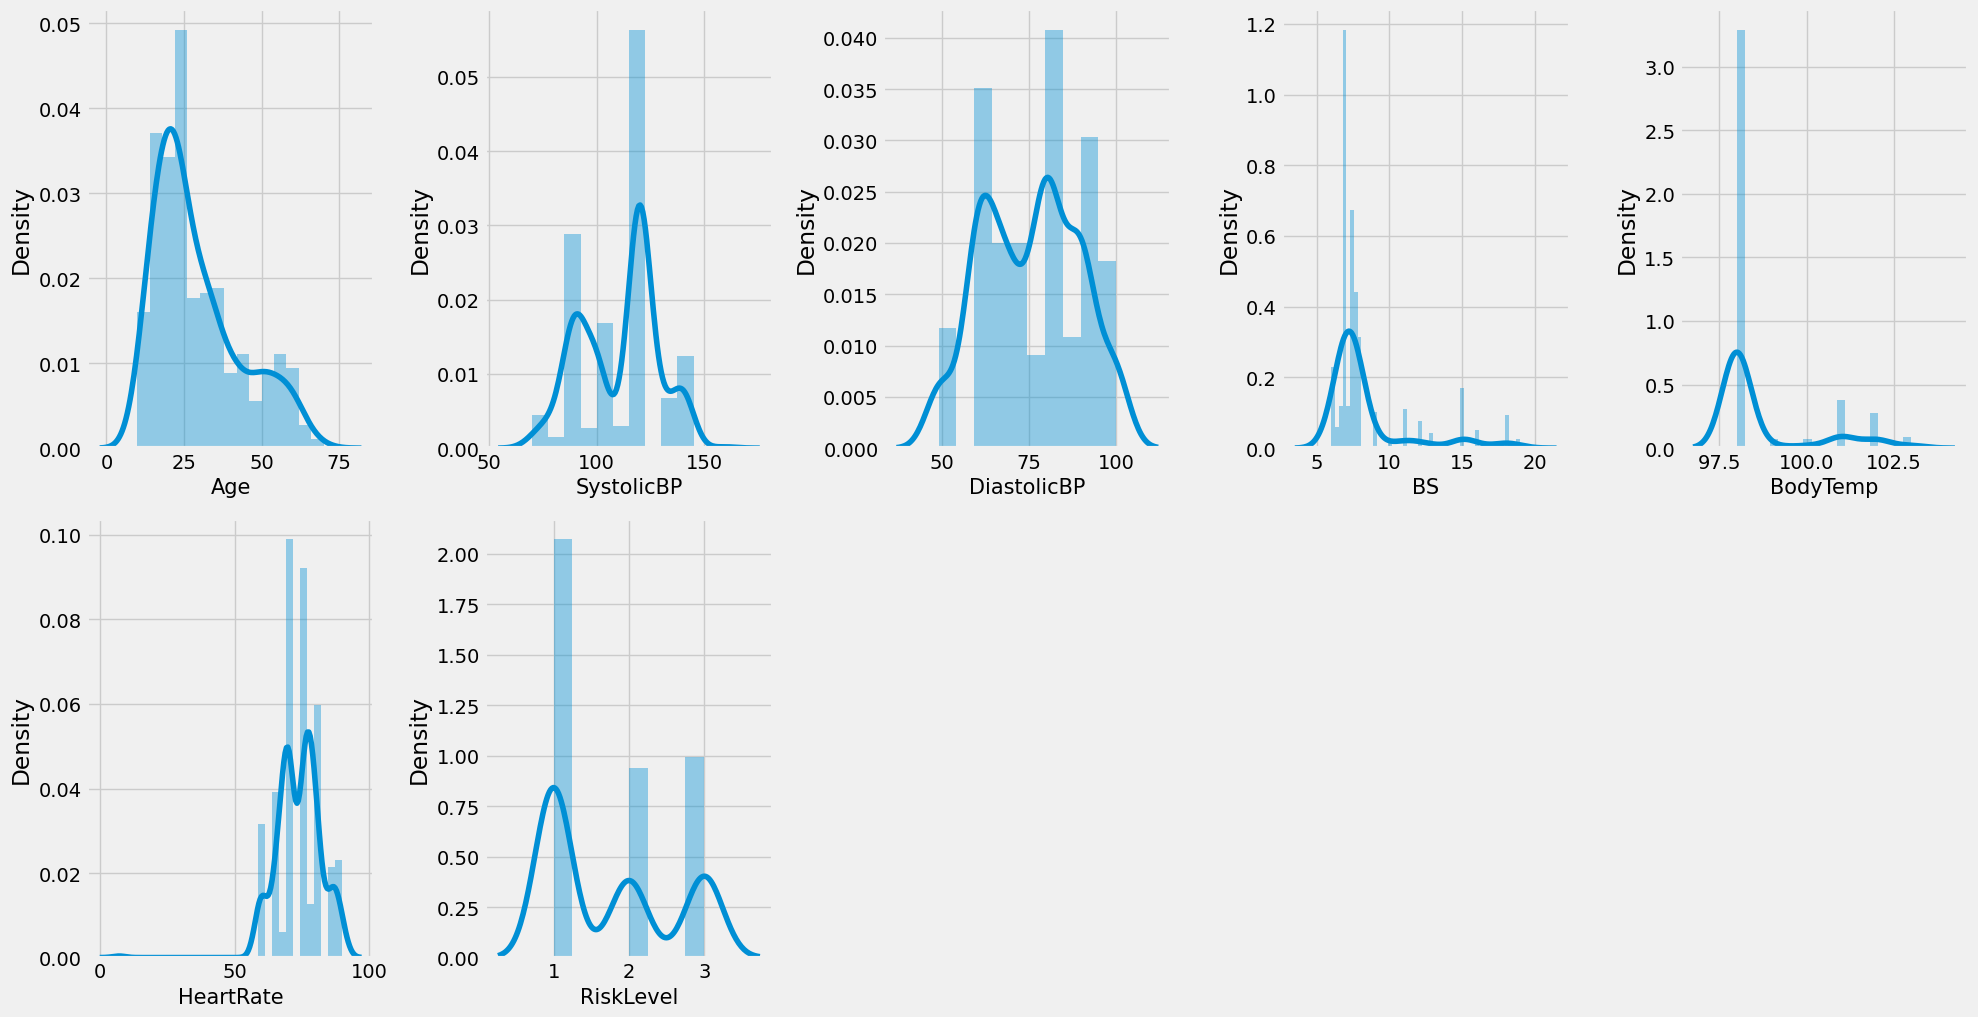

In [ ]:
plt.figure(figsize = (20,15))
plotnumber = 1

for column in data:
    if plotnumber <= 7:

        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [ ]:
column_summary = {}

# Approximate Distinct Count
column_summary['Approximate Distinct Count'] = data["Age"].nunique()

# Approximate Unique (%)
approx_unique_percentage = (column_summary['Approximate Distinct Count'] / len(data["Age"])) * 100
column_summary['Approximate Unique (%)'] = f"{approx_unique_percentage:.1f}%"

# Missing Values
column_summary["Missing"] = data["Age"].isnull().sum()

# Missing (%)
missing_percentage = (column_summary['Missing'] / len(data["Age"])) * 100
column_summary['Missing (%)'] = f"{missing_percentage:.1f}%"

# Infinite Values (if applicable)
column_summary["Infinite"] = data["Age"].isin([float("inf"),float("-inf")]).sum()
infinite_percentage = (column_summary['Infinite'] / len(data["Age"])) * 100
column_summary['Infinite (%)'] = f"{infinite_percentage:.1f}%"

# Memory Size (assuming column is a Series)
column_summary['Memory Size'] = data['Age'].memory_usage(deep=True) / 1024  # in KB

# Mean
column_summary['Mean'] = data["Age"].mean()

# Minimum
column_summary['Minimum'] = data["Age"].min()

# Maximum
column_summary['Maximum'] = data["Age"].max()

# Zeros
column_summary['Zeros'] = (data["Age"] == 0).sum()

# Zeros (%)
zeros_percentage = (column_summary['Zeros'] / len(data["Age"])) * 100
column_summary['Zeros (%)'] = f"{zeros_percentage:.1f}%"
column_summary['Negatives'] = (data["Age"] < 0).sum()

# Negatives (%)
negatives_percentage = (column_summary['Negatives'] / len(data["Age"])) * 100
column_summary['Negatives (%)'] = f"{negatives_percentage:.1f}%"



# Display the summary
for key, value in column_summary.items():
    print(f"{key}\t{value}")

Approximate Distinct Count	50
Approximate Unique (%)	11.1%
Missing	0
Missing (%)	0.0%
Infinite	0
Infinite (%)	0.0%
Memory Size	7.0625
Mean	29.194690265486727
Minimum	10
Maximum	70
Zeros	0
Zeros (%)	0.0%
Negatives	0
Negatives (%)	0.0%


In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
#Assuming we have an "Age" column in this data set stored in a numpy array called "df"

df = np.array(data["Age"])

# Calculate Mean
mean = np.mean(df)

# Calculate Standard Deviation
std_dev = np.std(df)

# Calculate Variance
variance = np.var(df)

# Calculate Sum
total_sum = np.sum(df)

# Calculate Skewness
skewness = skew(df)

# Calculate Kurtosis
kurt = kurtosis(df)

# Calculate Coefficient of Variation
coef_variation = std_dev / mean
# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Variance:", variance)
print("Sum:", total_sum)
print("Skewness:", skewness)
print("Kurtosis:", kurt)
print("Coefficient of Variation:", coef_variation)

Mean: 29.194690265486727
Standard Deviation: 13.752141205496798
Variance: 189.12138773592295
Sum: 13196
Skewness: 0.9190166099923903
Kurtosis: -0.10194052893537409
Coefficient of Variation: 0.4710493956414484


In [ ]:
#Assuming we have an "Age" column in this data set stored in a numpy array called "df"

df = np.array(data["Age"])

# Calculate Minimum
minimum = np.min(df)

# Calculate 5th Percentile
percentile_5 = np.percentile(df, 5)

# Calculate Q1 (First Quartile)
q1 = np.percentile(df, 25)

# Calculate Median
median = np.median(df)

# Calculate Q3 (Third Quartile)
q3 = np.percentile(df, 75)

# Calculate 95th Percentile
percentile_95 = np.percentile(df, 95)

# Calculate Maximum
maximum = np.max(df)
# Calculate Range
data_range = maximum - minimum

# Calculate Interquartile Range (IQR)
iqr = q3 - q1

# Print the results
print("Minimum:", minimum)
print("5th Percentile:", percentile_5)
print("Q1 (First Quartile):", q1)
print("Median:", median)
print("Q3 (Third Quartile):", q3)
print("95th Percentile:", percentile_95)
print("Maximum:", maximum)
print("Range:", data_range)
print("IQR (Interquartile Range):", iqr)

Minimum: 10
5th Percentile: 12.0
Q1 (First Quartile): 19.0
Median: 25.0
Q3 (Third Quartile): 35.0
95th Percentile: 59.44999999999999
Maximum: 70
Range: 60
IQR (Interquartile Range): 16.0


In [ ]:
# RiskLevel Column

column_summary = {}

# Approximate Distinct Count
column_summary['Approximate Distinct Count'] = data["RiskLevel"].nunique()

# Approximate Unique (%)
approx_unique_percentage = (column_summary['Approximate Distinct Count'] / len(data["RiskLevel"])) * 100
column_summary['Approximate Unique (%)'] = f"{approx_unique_percentage:.1f}%"

# Missing Values
column_summary["Missing"] = data["RiskLevel"].isnull().sum()

# Missing (%)
missing_percentage = (column_summary['Missing'] / len(data["RiskLevel"])) * 100
column_summary['Missing (%)'] = f"{missing_percentage:.1f}%"

# Memory Size (assuming column is a Series)
column_summary['Memory Size'] = data['RiskLevel'].memory_usage(deep=True) / 1024  # in KB


# Display the summary
for key, value in column_summary.items():
   print(f"{key}\t{value}")

Approximate Distinct Count	3
Approximate Unique (%)	0.7%
Missing	0
Missing (%)	0.0%
Memory Size	7.0625


In [ ]:
import collections

In [ ]:
data1 = pd.read_csv("Maternal Health Risk Data Set.csv")

In [ ]:
data1.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
text = data1["RiskLevel"]

In [ ]:
# Count occurrences of each character type
count = len(text)
lowercase_count = sum(1 for char in text if char.islower())
uppercase_count = sum(1 for char in text if char.isupper())
space_count = sum(1 for char in text if char.isspace())
dash_count = sum(1 for char in text if char == "-")
decimal_count = sum(1 for char in text if char.isdigit())

# Print the results
print("Count:", count)
print("Lowercase Letter:", lowercase_count)
print("Uppercase Letter:", uppercase_count)
print("Space Separator:", space_count)
print("Dash Punctuation:", dash_count)
print("Decimal Number:", decimal_count)

Count: 1014
Lowercase Letter: 1014
Uppercase Letter: 0
Space Separator: 0
Dash Punctuation: 0
Decimal Number: 0


In [ ]:
# Assuming you have a list or array of values called 'data'
df = data["RiskLevel"].head(9)

# Iterate through the data and print out each value along with its row number
for i, value in enumerate(df, start=1):

    print(f"{i}{'st' if i == 1 else 'nd' if i == 2 else 'rd' if i == 3 else 'th'} row\t{value}")


1st row	3.0
2nd row	3.0
3rd row	3.0
4th row	3.0
5th row	1.0
6th row	3.0
7th row	2.0
8th row	3.0
9th row	2.0


In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


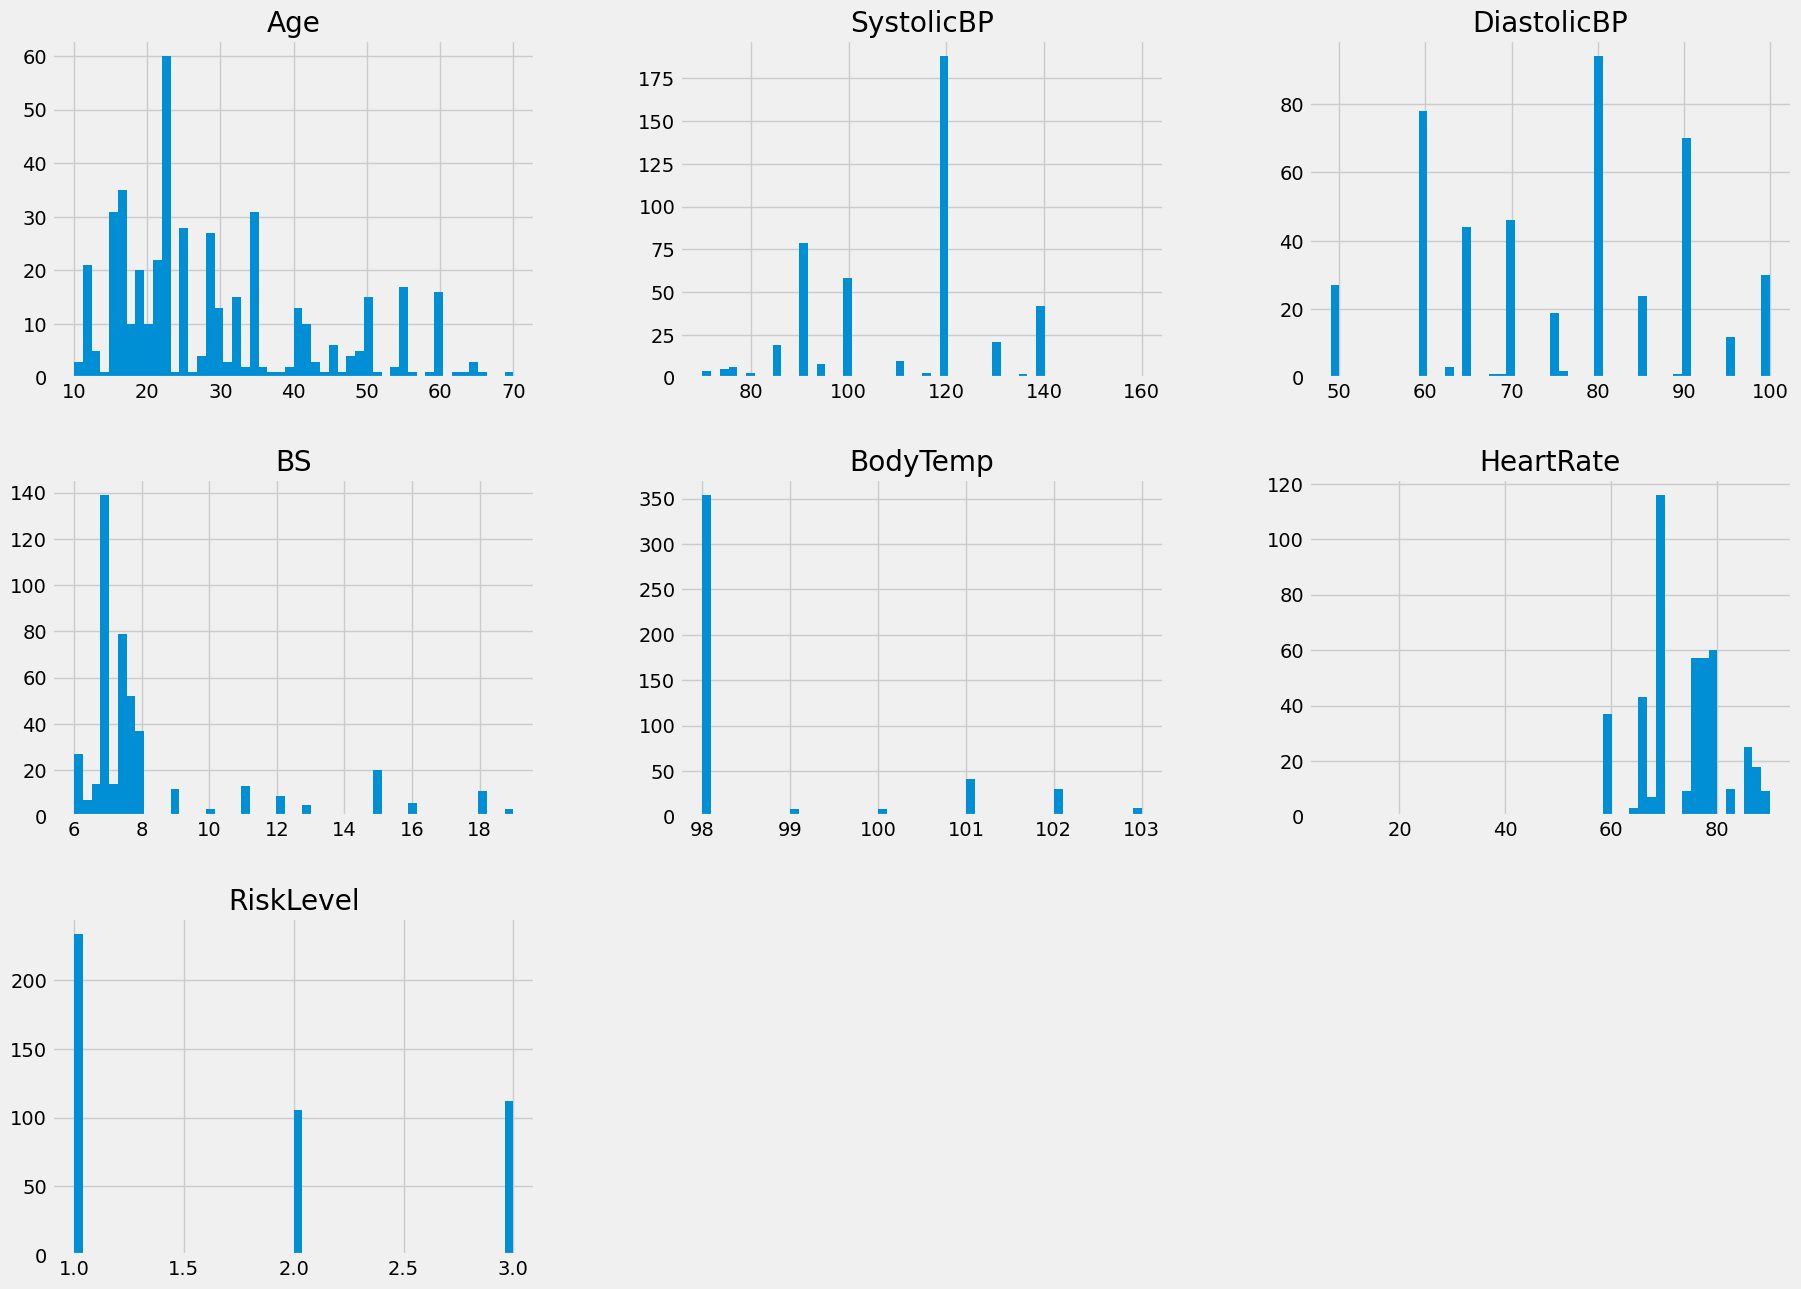

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='RiskLevel', ylabel='count'>

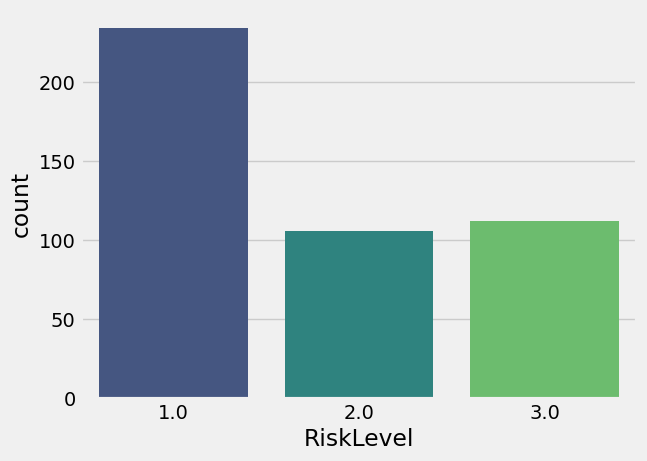

In [ ]:
sns.countplot(x = "RiskLevel", data = data, palette = "viridis")

In [ ]:
data["RiskLevel"].value_counts()

RiskLevel
1.0    234
3.0    112
2.0    106
Name: count, dtype: int64

In [ ]:
data["RiskLevel"].value_counts() * 100 / len(data)

RiskLevel
1.0    51.769912
3.0    24.778761
2.0    23.451327
Name: count, dtype: float64

## Plotting `RiskLevel` with remaining columns

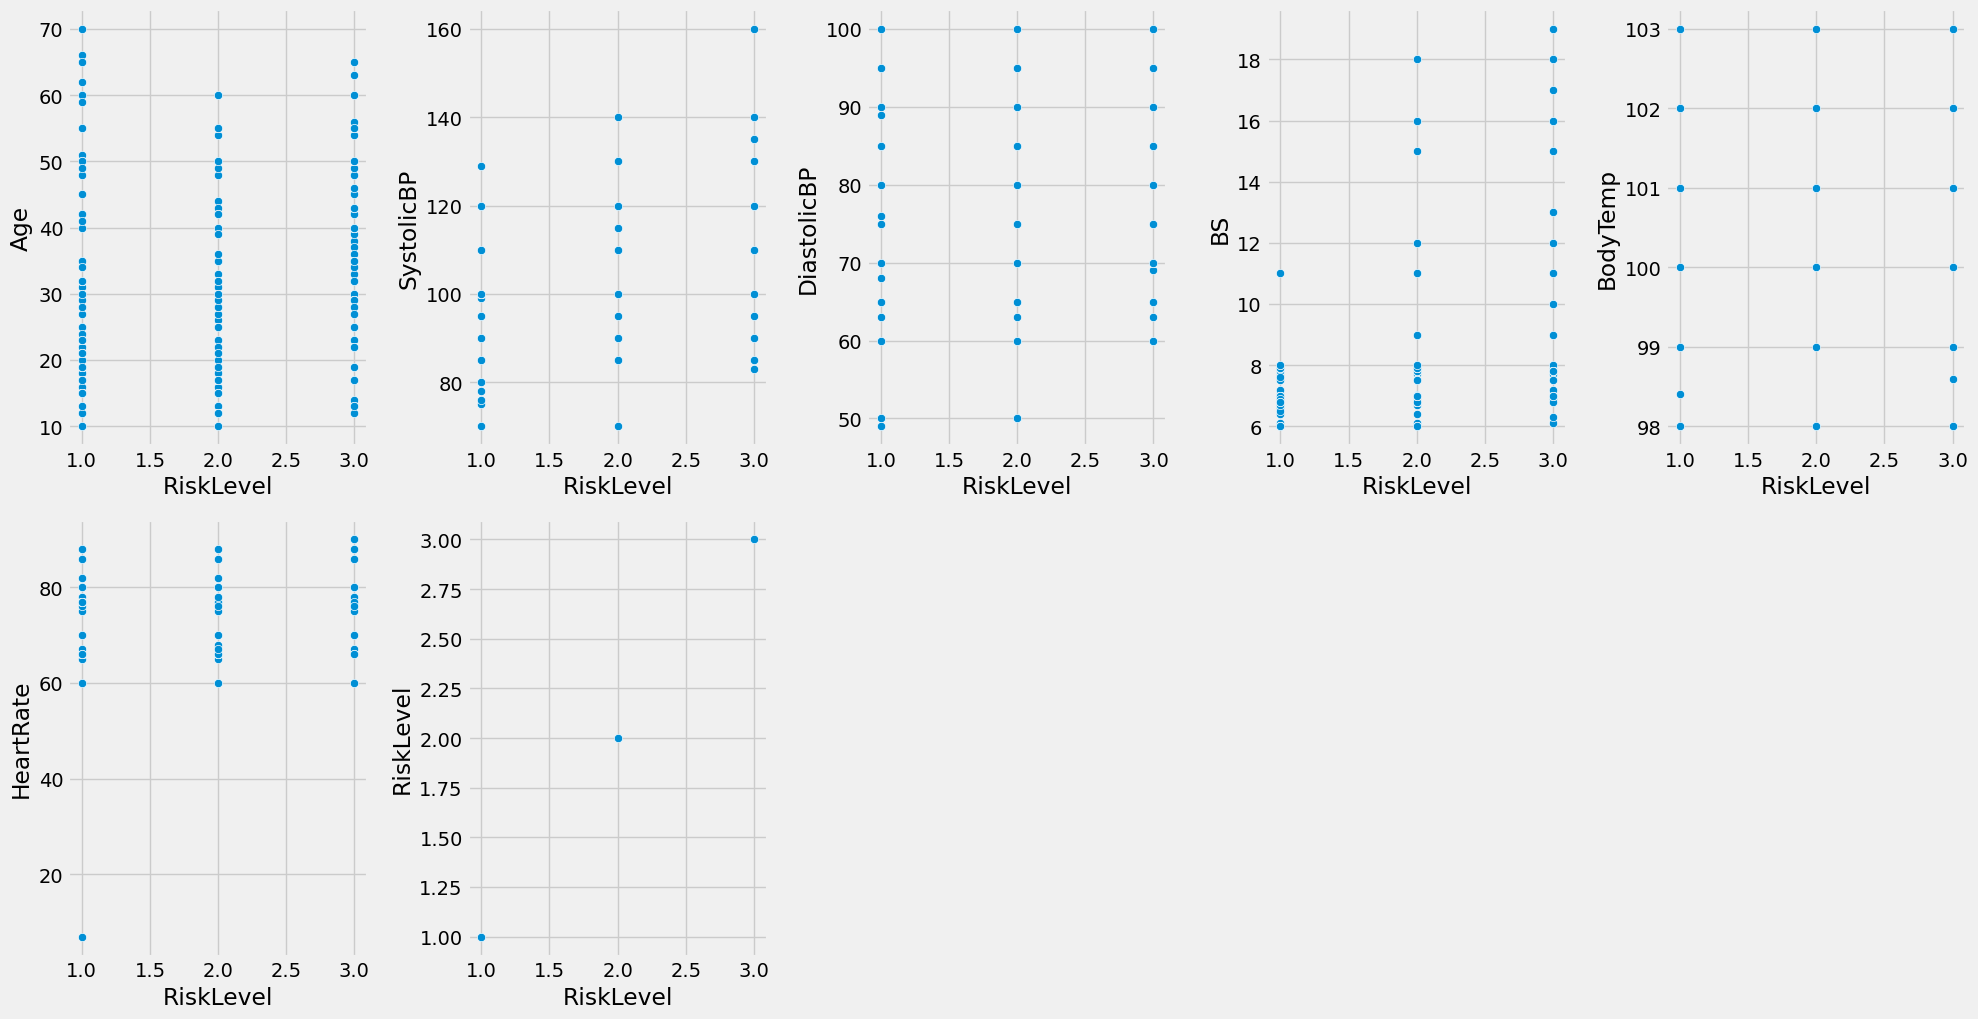

In [ ]:
## Plotting `RiskLevel` with remaining columns
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
    if plotnumber <= 7:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = data["RiskLevel"], y = data[column])

    plotnumber += 1

plt.tight_layout()
plt.show()


# looking for outliers using box plot

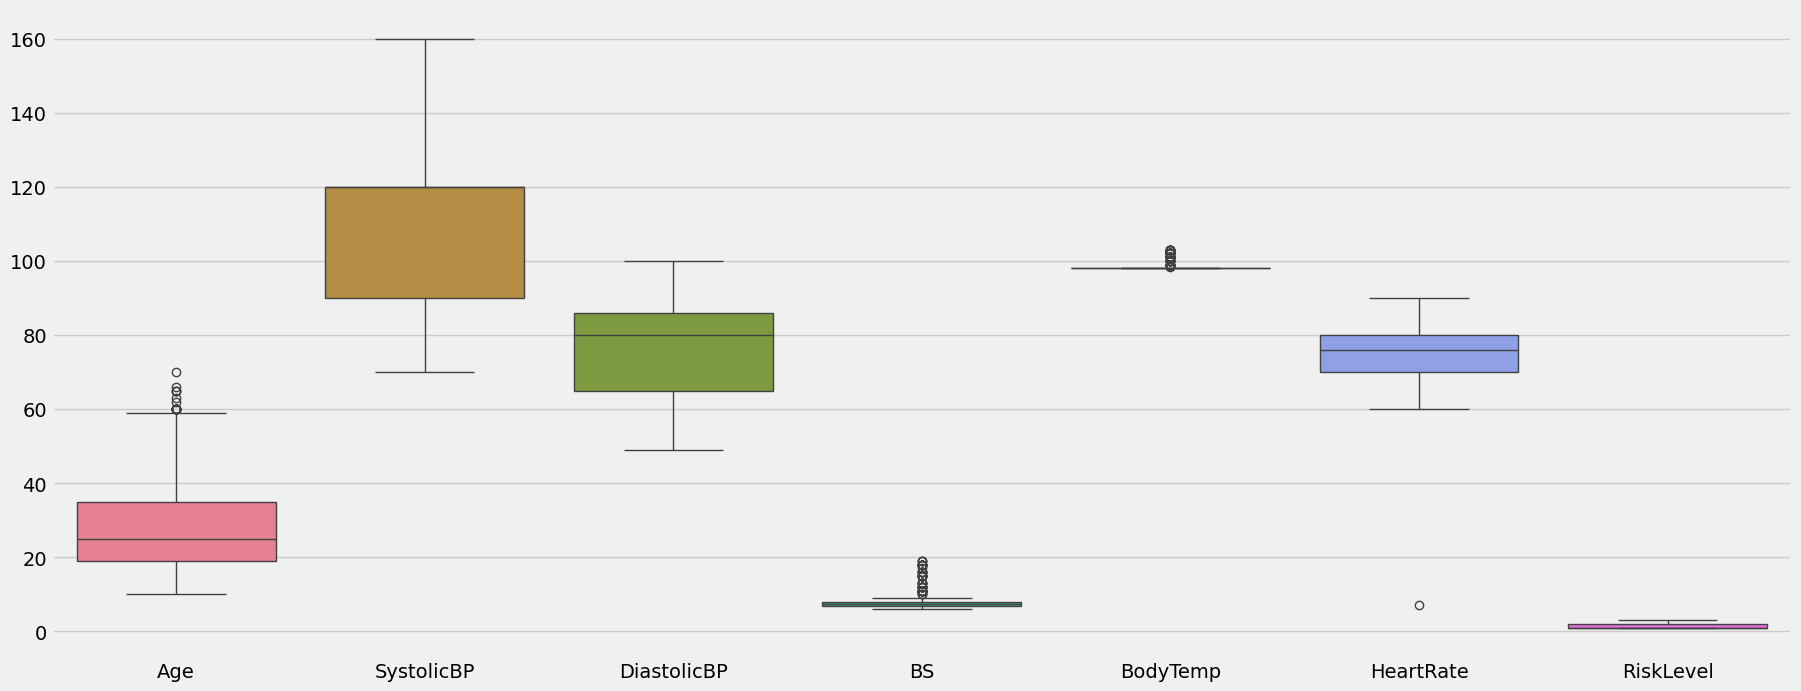

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

# creating features and label variable

In [ ]:
X = data.iloc[0:,:-1]

In [ ]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70
674,15,100,60,6.0,98.0,80
703,15,100,49,7.6,98.0,77
704,12,100,50,6.0,98.0,70


In [ ]:
y = data.iloc[:,-1]

In [ ]:
y

0      3.0
1      3.0
2      3.0
3      3.0
4      1.0
      ... 
673    2.0
674    1.0
703    1.0
704    2.0
705    1.0
Name: RiskLevel, Length: 452, dtype: float64

In [ ]:
print(X.shape,y.shape)

(452, 6) (452,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(452, 6) (361, 6) (91, 6) (361,) (91,)


In [ ]:
ss = StandardScaler()

In [ ]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train

array([[ 1.44977626,  1.62067003,  1.04736016,  2.46249992, -0.49667515,
         2.21625558],
       [-0.00342166,  0.51417002, -0.03045346, -0.39785768,  0.90739477,
        -0.53690431],
       [-0.29406124,  0.51417002,  0.32881775, -0.17783017, -0.49667515,
        -1.08753629],
       ...,
       [ 1.08647678,  0.51417002,  1.04736016,  2.82921243, -0.49667515,
         0.83967563],
       [-1.0206602 ,  0.51417002,  0.32881775, -0.46753306, -0.49667515,
        -0.53690431],
       [-0.29406124,  0.51417002,  1.04736016,  1.36236238,  1.60942972,
         0.83967563]])

In [ ]:
X_test

array([[-1.23863989e+00, -1.14558000e+00, -1.10826708e+00,
        -2.87843927e-01,  2.31146468e+00, -1.91348425e+00],
       [-2.94061240e-01,  5.14170020e-01,  1.76590258e+00,
        -5.44542686e-01, -4.96675146e-01, -1.91348425e+00],
       [-7.30020615e-01, -1.14558000e+00, -3.89724667e-01,
        -1.77830173e-01, -4.96675146e-01,  8.39675633e-01],
       [-1.23863989e+00, -8.68954996e-01, -1.10826708e+00,
        -2.87843927e-01, -4.96675146e-01, -1.22519428e+00],
       [-8.75340407e-01, -3.90799866e-02, -3.04534597e-02,
        -5.07871435e-01,  1.60942972e+00,  2.89043656e-01],
       [-2.94061240e-01,  5.14170020e-01,  3.28817748e-01,
        -1.41158922e-01, -4.96675146e-01, -1.08753629e+00],
       [ 6.92382386e-02,  5.14170020e-01,  3.28817748e-01,
        -5.07871435e-01,  1.60942972e+00,  2.89043656e-01],
       [ 2.46701480e+00,  1.62067003e+00,  1.04736016e+00,
         2.46249992e+00, -4.96675146e-01,  2.21625558e+00],
       [ 2.24903511e+00, -1.14558000e+00, -7.489

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel = "rbf", random_state = 0, gamma = 0.10, C = 1.0)

In [ ]:
svm.fit(X_train,y_train)

SVC(gamma=0.1, random_state=0)

In [ ]:

print("Train accuracy:", svm.score(X_train,y_train))
print("Test accuracy:", svm.score(X_test,y_test))

Train accuracy: 0.7229916897506925
Test accuracy: 0.6703296703296703


In [ ]:
y_pred = svm.predict(X_test)
print(y_pred)

[3. 1. 1. 1. 2. 1. 2. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 1. 1. 3.
 1. 1. 3. 1. 1. 1. 1. 2. 2. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 3. 3. 3.
 1. 1. 3. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 3. 2. 1. 1. 3. 1. 3. 3. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1.]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(f"CM:",cm)

CM: [[44  2  4]
 [15  2  5]
 [ 2  2 15]]


In [ ]:
print(f"Accuracy",accuracy_score(y_test, y_pred)*100, "%")

Accuracy 67.03296703296702 %


In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.72      0.88      0.79        50
         2.0       0.33      0.09      0.14        22
         3.0       0.62      0.79      0.70        19

    accuracy                           0.67        91
   macro avg       0.56      0.59      0.54        91
weighted avg       0.61      0.67      0.62        91



## Initialize LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

# Fit LabelEncoder on y_train and transform

In [ ]:
y_train_encoded = label_encoder.fit_transform(y_train)

# Label ecoding of y_test

In [ ]:
y_test_encoder = label_encoder.transform(y_test)

In [ ]:
y_test_encoder

array([0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 1, 0])

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
xgb_clf = xgb_clf.fit(X_train,y_train_encoded)

In [ ]:
print("Train Accuracy:", xgb_clf.score(X_train,y_train_encoded))
print("Test Accuracy:", xgb_clf.score(X_test,y_test_encoder))

Train Accuracy: 0.9362880886426593
Test Accuracy: 0.6483516483516484


In [ ]:
y_pred = xgb_clf.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 2 2 0 0 1 1 2 0 0 1 2 1 2 0 0 1 0 0 1 1 1 0 1 0 1 1 0 2 2 0
 0 1 2 0 0 0 1 0 2 1 2 1 0 2 0 0 1 2 0 0 0 2 0 2 2 2 2 0 1 0 1 2 2 0 0 0 0
 0 0 2 2 0 0 0 1 1 0 0 0 1 2 2 0 0]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(f"CM",cm)

CM [[ 0  0  0  0]
 [36 11  3  0]
 [ 7  9  6  0]
 [ 1  4 14  0]]


In [ ]:
print(f"Accuracy:", accuracy_score(y_test_encoder,y_pred) * 100, "%")

Accuracy: 64.83516483516483 %


In [ ]:
print(classification_report(y_test_encoder,xgb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.38      0.41      0.39        22
           2       0.61      0.74      0.67        19

    accuracy                           0.65        91
   macro avg       0.60      0.62      0.61        91
weighted avg       0.67      0.65      0.65        91



#Applying Decision Tree

In [ ]:

from sklearn import tree

#Create tree object

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion = "gini")

#Train DT based on scaled training set

In [ ]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Train Accuracy:", decision_tree.score(X_train,y_train))
print("Test Accuracy:", decision_tree.score(X_test,y_test))

Train Accuracy: 0.9362880886426593
Test Accuracy: 0.6593406593406593


In [ ]:
y_pred = decision_tree.predict(X_test)
print(y_pred)

[1. 2. 1. 1. 3. 1. 2. 3. 1. 1. 1. 2. 2. 3. 2. 1. 2. 3. 2. 3. 1. 1. 2. 1.
 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 3. 2. 1. 3. 2. 3. 1. 2. 1. 2. 1. 3. 2. 1.
 2. 1. 3. 1. 1. 2. 3. 2. 1. 1. 3. 1. 3. 3. 3. 3. 1. 2. 2. 2. 3. 3. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 2. 2. 1. 1. 2. 3. 3. 3. 1. 1.]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(f"CM:", cm)

CM: [[33 15  2]
 [ 8 10  4]
 [ 0  2 17]]


In [ ]:
print(f"Accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")

Accuracy:  65.93406593406593 %


In [ ]:
print(classification_report(y_test, decision_tree.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.80      0.66      0.73        50
         2.0       0.37      0.45      0.41        22
         3.0       0.74      0.89      0.81        19

    accuracy                           0.66        91
   macro avg       0.64      0.67      0.65        91
weighted avg       0.69      0.66      0.67        91



#Applying RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create Random Forest object

In [ ]:
random_forest = RandomForestClassifier()

#Train model

In [ ]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print("Train Accuracy:", random_forest.score(X_train,y_train))
print("Test Accuracy:", random_forest.score(X_test, y_test))

Train Accuracy: 0.9362880886426593
Test Accuracy: 0.6813186813186813


In [ ]:
y_pred = random_forest.predict(X_test)
print(y_pred)

[3. 2. 1. 1. 2. 1. 2. 3. 1. 1. 1. 2. 2. 3. 1. 1. 2. 3. 2. 3. 1. 1. 2. 1.
 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 3. 3. 1. 1. 2. 3. 1. 1. 1. 2. 1. 3. 3. 3.
 2. 1. 3. 1. 1. 2. 3. 1. 1. 1. 3. 1. 3. 1. 3. 3. 1. 1. 1. 1. 3. 3. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 2. 2. 1. 1. 1. 3. 3. 3. 1. 1.]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(f"CM",cm)


CM [[37 10  3]
 [ 8  9  5]
 [ 2  1 16]]


In [ ]:
print(f"Accuracy:",accuracy_score(y_test,y_pred) * 100, "%")

Accuracy: 68.13186813186813 %


In [ ]:
print(classification_report(y_test, random_forest.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.79      0.74      0.76        50
         2.0       0.45      0.41      0.43        22
         3.0       0.67      0.84      0.74        19

    accuracy                           0.68        91
   macro avg       0.63      0.66      0.65        91
weighted avg       0.68      0.68      0.68        91



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
print("Train Accuracy:", nb.score(X_train,y_train))
print("Test Accuracy:", nb.score(X_test,y_test))

Train Accuracy: 0.6648199445983379
Test Accuracy: 0.6593406593406593


In [ ]:
y_pred = nb.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 1. 2. 1. 1. 1. 3.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 3. 3.
 1. 1. 2. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1.]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(f"CM",cm)

CM [[47  2  1]
 [16  2  4]
 [ 5  3 11]]


In [ ]:
print(f"Accoracy:", accuracy_score(y_test,y_pred) * 100, "%")

Accoracy: 65.93406593406593 %


In [ ]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.69      0.94      0.80        50
         2.0       0.29      0.09      0.14        22
         3.0       0.69      0.58      0.63        19

    accuracy                           0.66        91
   macro avg       0.55      0.54      0.52        91
weighted avg       0.59      0.66      0.60        91



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lo = LogisticRegression()

In [ ]:
lo.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print("Train Accuracy:", lo.score(X_train,y_train))
print("Test Accuracy:", lo.score(X_test,y_test))

Train Accuracy: 0.6759002770083102
Test Accuracy: 0.6703296703296703


In [ ]:
y_pred = lo.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 2. 1. 3. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 3. 3. 3.
 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 3. 1. 3. 1. 3. 1. 1. 1. 1. 1. 3. 3. 1. 1.
 1. 1. 1. 1. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1.]


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(f"CM",cm)

CM [[47  0  3]
 [16  1  5]
 [ 5  1 13]]


In [ ]:
print(f"Accuracy: ", accuracy_score(y_test,y_pred) * 100, "%")

Accuracy:  67.03296703296702 %


In [ ]:
print(classification_report(y_test,lo.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.69      0.94      0.80        50
         2.0       0.50      0.05      0.08        22
         3.0       0.62      0.68      0.65        19

    accuracy                           0.67        91
   macro avg       0.60      0.56      0.51        91
weighted avg       0.63      0.67      0.59        91

